In [1]:
from tools import analysistools as atools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import random
from scipy.stats import sem
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.spatial import distance_matrix
import networkx as nx
import pickle

In [5]:
bsumm = None
nsumm = None
with open("/Users/joelforster/Projects/optidb/clus/budding.pickle", "rb") as f:
    bsumm = pickle.load(f)
    
with open("/Users/joelforster/Projects/optidb/clus/nonbudding.pickle", "rb") as f:
    nsumm = pickle.load(f)

In [2]:
atools.generateSummaries('/Users/joelforster/Projects/optidb/pts/rand/sample')

{'/Users/joelforster/Projects/optidb/pts/rand/sample/sim_rand_17_245kT_0_out.xyza': {'bt': -1,
  'clustering': 0.0,
  'corrs': [-57.678482991479875,
   376.75260265563213,
   -58.15224898190761,
   -86.85708005027378,
   0.9845382613846897],
  'density': 0,
  'graph': <networkx.classes.graph.Graph at 0x1c21616610>,
  'msd': [0.043045740489000034,
   0.23848693185849026,
   0.06184246251881014,
   0.02777293689540988,
   0.030238657443010002,
   0.06296692717944002,
   0.004959082221960062,
   0.10598279857183998,
   0.045248118131999866,
   10.198657791459993,
   8.787155103175994,
   16.284701422856,
   23.037921319860995,
   37.56546793158802,
   35.23257780441365,
   26.484699210021006,
   25.772378105160026,
   25.1310451775957,
   20.77417126730902,
   21.163891403420994,
   17.190141970288998,
   11.394045628590414,
   12.514439114563997,
   14.649890694360003,
   2300.7348066250247,
   8.246304723464,
   5.9085568019439965,
   2397.9539122700517,
   16.023904301060096,
   15.058

In [189]:
df = pd.DataFrame()
data = []
bmsd = []
nmsd = []
for k,v in bsumm.iteritems():
    data.append((v['density'],v['clustering'],'budding'))
    bmsd = [bmsd[i]+t for i,t in enumerate(v['msd'])] if len(bmsd) > 0 else [t for i,t in enumerate(v['msd'])]
for k,v in nsumm.iteritems():
    data.append((v['density'],v['clustering'],'non budding'))
    nmsd = [nmsd[i]+t for i,t in enumerate(v['msd'])] if len(nmsd) > 0 else [t for i,t in enumerate(v['msd'])]

bmsd = [t/float(len(bsumm)) for t in bmsd][1:]
nmsd = [t/float(len(nsumm)) for t in nmsd][1:]

df = pd.DataFrame(data, columns = ['den' , 'cls', 'cat' ]) 
df.to_csv("/Users/joelforster/Projects/optidb/clus/traj.csv",index=False)

In [192]:
x = np.log10([i+1 for i in range(len(bmsd))])
y = np.log10(bmsd)
z = np.polyfit(x, y, 1)
bpoly = np.poly1d(z)

bfit = lambda x: 10.0**bpoly(np.log10(x))

x = np.log10([i+1 for i in range(len(nmsd))])
y = np.log10(nmsd)
z = np.polyfit(x, y, 1)
npoly = np.poly1d(z)


nfit = lambda x: 10.0**npoly(np.log10(x))

In [193]:
print npoly

 
0.451 x + 0.2232


/Users/joelforster/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/Users/joelforster/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


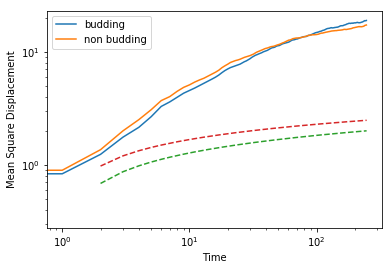

In [198]:
plt.loglog(bmsd,label='budding')
plt.loglog(nmsd,label='non budding')
plt.ylabel('Mean Square Displacement')
plt.loglog([i+1 for i in range(len(bmsd))],bfit(x), '--')
plt.loglog([i+1 for i in range(len(nmsd))],nfit(x), '--')
plt.xlabel('Time')
plt.legend()
plt.show()

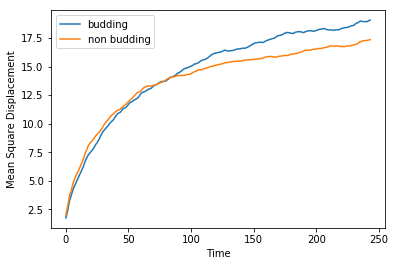

In [190]:
plt.plot(bmsd[3:],label='budding')
plt.plot(nmsd[3:],label='non budding')

plt.ylabel('Mean Square Displacement')
plt.xlabel('Time')
plt.legend()
plt.show()

In [69]:
print npoly

            2
-0.0003351 x + 0.1268 x + 4.876


In [44]:
p(0.5)

2.2122442707930934